In [2]:
import pandas as pd
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import plotly.express as px
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")
#Please ignore the warnings with version change

In [3]:
# Target Marketing Dataset
trainfile = r"F:\WP carey SEM 1\aaaa\Quarter 2\ML\assignment 2\Portugese Bank Data - TRAIN.csv"
trainData = pd.read_csv(trainfile) #creates a dataframe
testfile = r"F:\WP carey SEM 1\aaaa\Quarter 2\ML\assignment 2\Portugese Bank Data - TEST.csv"
testData = pd.read_csv(testfile)  #creates a dataframe


print(trainData.shape)
print(testData.shape)

(4521, 17)
(45211, 17)


In [4]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
trainData.isna().sum() # Data is clean their is no missing values in the given dataset

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
testData.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
trainData.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [9]:
#To get list of names of all Columns from a dataframe

TrainCols = list(trainData.columns.values)
TestCols = list(testData.columns.values)
print(TrainCols)
print(TestCols)

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [10]:
# Seperate Target column from Train Data
Xtrain = trainData[TrainCols[0:len(TrainCols)-1]].copy()
Ytrain = trainData[['y']].copy()
print("Train Set shape:")
print(Xtrain.shape)
print(Ytrain.shape)
Xtest = testData[TestCols[0:len(TestCols)-1]].copy()
Ytest = testData[['y']].copy()
print("Test Set shape:")
print(Xtest.shape)
print(Ytest.shape)

Train Set shape:
(4521, 16)
(4521, 1)
Test Set shape:
(45211, 16)
(45211, 1)


In [11]:
#List of Categorical Features
categoricalFeatures = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [12]:
# OneHotEncoding on Train (fit & transform)
# OneHotEncoding is to be done on Categorical variables.
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Fit and transform the categorical features
Xcat = ohe.fit_transform(Xtrain[categoricalFeatures])

# Get the feature names after one-hot encoding
feature_names = ohe.get_feature_names_out(input_features=categoricalFeatures)

# Create a DataFrame with the one-hot encoded features
Xcat = pd.DataFrame(Xcat, columns=feature_names, index=Xtrain.index)

# Concatenate the one-hot encoded features to the original dataframe
Xtrain = pd.concat([Xtrain, Xcat], axis=1)

# Drop the original categorical features
Xtrain.drop(labels=categoricalFeatures, axis=1, inplace=True)

# Sample 5 rows to check the result
Xtrain.sample(5)

,balance,day,duration,campaign,pdays,previous,age_19,age_20,age_21,age_22,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1033,534,18,382,1,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1996,1573,17,279,1,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1375,9121,5,147,1,-1,0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2565,817,18,123,1,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3408,8669,20,5,3,150,6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [13]:
# OneHotEncoding on Test (only transform)
# OneHotEncoding is to be done on Categorical variables.
Xcat = pd.DataFrame(ohe.transform(Xtest[categoricalFeatures]),columns=ohe.get_feature_names_out(),index=Xtest.index)
Xtest = pd.concat([Xtest,Xcat],axis=1)
Xtest.drop(labels=categoricalFeatures,axis=1,inplace=True)
Xtest.sample(5)

,balance,day,duration,campaign,pdays,previous,age_19,age_20,age_21,age_22,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
22549,712,22,97,5,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
21988,439,20,156,12,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1641,85,9,116,2,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15850,57,21,162,2,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4126,953,19,135,1,-1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
print(Xtrain.shape)
print(Xtest.shape)

(4521, 117)
(45211, 117)


In [15]:
dt = DecisionTreeClassifier()
dt.fit(Xtrain, Ytrain)

DecisionTreeClassifier()

In [16]:
rf = RandomForestClassifier()
rf.fit(Xtrain, Ytrain)

RandomForestClassifier()

In [30]:
X_Pred = dt.predict(Xtest)
XPred = dt.predict(Xtrain)
#Model Accuracy
print("Train Accuracy:", metrics.accuracy_score(Ytrain,XPred))
print("Test Accuracy:", metrics.accuracy_score(Ytest,X_Pred))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,X_Pred))
print("Max Depth",dt.get_depth())
print("Leaf",dt.get_n_leaves())
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, X_Pred))

Train Accuracy: 1.0
Test Accuracy: 0.8871513569706487
Confusion Matrix for Decision Tree:
[[37440  2482]
 [ 2620  2669]]
Max Depth 32
Leaf 384
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          no       0.93      0.94      0.94     39922
         yes       0.52      0.50      0.51      5289

    accuracy                           0.89     45211
   macro avg       0.73      0.72      0.72     45211
weighted avg       0.89      0.89      0.89     45211



In [31]:
X_Pred1 = rf.predict(Xtest)
XPred1 = rf.predict(Xtrain)
#Model Accuracy
print("Train Accuracy:", metrics.accuracy_score(Ytrain,XPred1))
print("Test Accuracy:", metrics.accuracy_score(Ytest,X_Pred1))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,X_Pred1))
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, X_Pred1))

Train Accuracy: 1.0
Test Accuracy: 0.9101767269027449
Confusion Matrix for Decision Tree:
[[39423   499]
 [ 3562  1727]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          no       0.92      0.99      0.95     39922
         yes       0.78      0.33      0.46      5289

    accuracy                           0.91     45211
   macro avg       0.85      0.66      0.71     45211
weighted avg       0.90      0.91      0.89     45211



In [35]:
#Hyperparameter tuning done for decision tree classifier

#RANDOM SEARCH--------------------------------------------

import time
start_time = time.time()

print("RandomizedSearchCV-Decision tree")
parameters={'min_samples_leaf' : range(10,300,10),'max_depth': 
            range(5,60,4),'criterion':['gini','entropy']}
dt_random = RandomizedSearchCV(dt,parameters,n_iter=100,cv=5)
dt_random.fit(Xtrain, Ytrain)
grid_parm=dt_random.best_params_
print(grid_parm)

# all_inter = dt_random.cv_results_
# print(all_inter)

print("accuracy Score for Decision Tree:{0:6f}".
      format(dt_random.score(Xtest,Ytest)))

print("time taken to complete %s seconds" % (time.time() - start_time))

RandomizedSearchCV-Decision tree
{'min_samples_leaf': 60, 'max_depth': 57, 'criterion': 'gini'}
accuracy Score for Decision Tree:0.896596
time taken to complete 17.23666501045227 seconds


In [36]:
#GRID SEARCH----------------------------------------

import time
start_time = time.time()

print("GridSearchCV-Decision tree")
dt_grid = GridSearchCV(dt,parameters)
dt_grid.fit(Xtrain, Ytrain)

# Access the number of iterations performed
n_iterations = len(dt_grid.cv_results_['params'])

print(f"Number of iterations performed: {n_iterations}")

grid_parm1=dt_grid.best_params_
grid = dt_grid.best_estimator_
best_score = dt_grid.best_score_ # This line of code will return the accuracy of the best model optimzied by decision tree classifier
print(best_score)
print(grid)
print(grid_parm1)
print("accuracy Score for Decision Tree:{0:6f}".
      format(dt_grid.score(Xtest,Ytest)))

print("Time taken to complete %s seconds" % (time.time() - start_time))

GridSearchCV-Decision tree
Number of iterations performed: 812
0.8973690901090304
DecisionTreeClassifier(max_depth=5, min_samples_leaf=20)
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20}
accuracy Score for Decision Tree:0.899781
Time taken to complete 139.56036686897278 seconds


In [37]:
#Using the parameters obtained from HyperParameterTuning in the DecisionTreeClassifier 
dtRand = DecisionTreeClassifier(**grid_parm)
dtGrid = DecisionTreeClassifier(**grid_parm1)

dtRand.fit(Xtrain,Ytrain)
dtRand_predict = dtRand.predict(Xtest)
dtGrid.fit(Xtrain,Ytrain)
dtGrid_predict = dtGrid.predict(Xtest)

In [38]:
# Accuracy for Decision Tree using Random Search CV for Hyperparameter Tuning

print("Test Accuracy:", metrics.accuracy_score(Ytest,dtRand_predict))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,dtRand_predict))
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, dtRand_predict))
clf_cv_score = cross_val_score(dtRand, Xtrain, Ytrain, cv=5, scoring="balanced_accuracy")
print(clf_cv_score)

Test Accuracy: 0.8965959611598947
Confusion Matrix for Decision Tree:
[[38265  1657]
 [ 3018  2271]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          no       0.93      0.96      0.94     39922
         yes       0.58      0.43      0.49      5289

    accuracy                           0.90     45211
   macro avg       0.75      0.69      0.72     45211
weighted avg       0.89      0.90      0.89     45211

[0.64050595 0.63509615 0.63653846 0.68192308 0.64197115]


In [39]:
# Accuracy for Decision Tree using Grid Search for Hyperparameter Tuning

print("Test Accuracy:", metrics.accuracy_score(Ytest,dtGrid_predict))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,dtGrid_predict))
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, dtGrid_predict))
clf_cv_score = cross_val_score(dtGrid, Xtrain, Ytrain, cv=5, scoring="balanced_accuracy")
print(clf_cv_score)

Test Accuracy: 0.8997810267412798
Confusion Matrix for Decision Tree:
[[39051   871]
 [ 3660  1629]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          no       0.91      0.98      0.95     39922
         yes       0.65      0.31      0.42      5289

    accuracy                           0.90     45211
   macro avg       0.78      0.64      0.68     45211
weighted avg       0.88      0.90      0.88     45211

[0.64089286 0.64783654 0.64552885 0.62274038 0.64634615]


In [40]:
#Hyperparameter tuning done for random forest classifier

#RANDOM SEARCH--------------------------------------------

import time
start_time = time.time()

print("RandomizedSearchCV-Random forest")
rand_parameters={'min_samples_leaf' : range(10,100,10),'max_depth': 
            range(1,10,2),'max_features':[10,20,30],'n_estimators':[20,30,40]}
rf_random = RandomizedSearchCV(rf,rand_parameters,n_iter=25,cv=5)
rf_random.fit(Xtrain, Ytrain)
grid_parm=rf_random.best_params_
print(grid_parm)
print("accuracy Score for Decision Tree:{0:6f}".
      format(rf_random.score(Xtest,Ytest)))

print("--- %s seconds ---" % (time.time() - start_time))

RandomizedSearchCV-Random forest
{'n_estimators': 20, 'min_samples_leaf': 20, 'max_features': 30, 'max_depth': 5}
accuracy Score for Decision Tree:0.898498
--- 16.20893669128418 seconds ---


In [41]:
#Visualize decision tree
text_representation = tree.export_text(dtRand)
print(text_representation)

|--- feature_2 <= 645.50
|   |--- feature_115 <= 0.50
|   |   |--- feature_2 <= 222.50
|   |   |   |--- feature_2 <= 90.50
|   |   |   |   |--- feature_85 <= 0.50
|   |   |   |   |   |--- feature_4 <= 238.00
|   |   |   |   |   |   |--- feature_82 <= 0.50
|   |   |   |   |   |   |   |--- class: no
|   |   |   |   |   |   |--- feature_82 >  0.50
|   |   |   |   |   |   |   |--- feature_0 <= 372.50
|   |   |   |   |   |   |   |   |--- class: no
|   |   |   |   |   |   |   |--- feature_0 >  372.50
|   |   |   |   |   |   |   |   |--- class: no
|   |   |   |   |   |--- feature_4 >  238.00
|   |   |   |   |   |   |--- class: no
|   |   |   |   |--- feature_85 >  0.50
|   |   |   |   |   |--- class: no
|   |   |   |--- feature_2 >  90.50
|   |   |   |   |--- feature_94 <= 0.50
|   |   |   |   |   |--- feature_109 <= 0.50
|   |   |   |   |   |   |--- feature_3 <= 1.50
|   |   |   |   |   |   |   |--- feature_0 <= 985.00
|   |   |   |   |   |   |   |   |--- feature_2 <= 153.50
|   |   |   |   

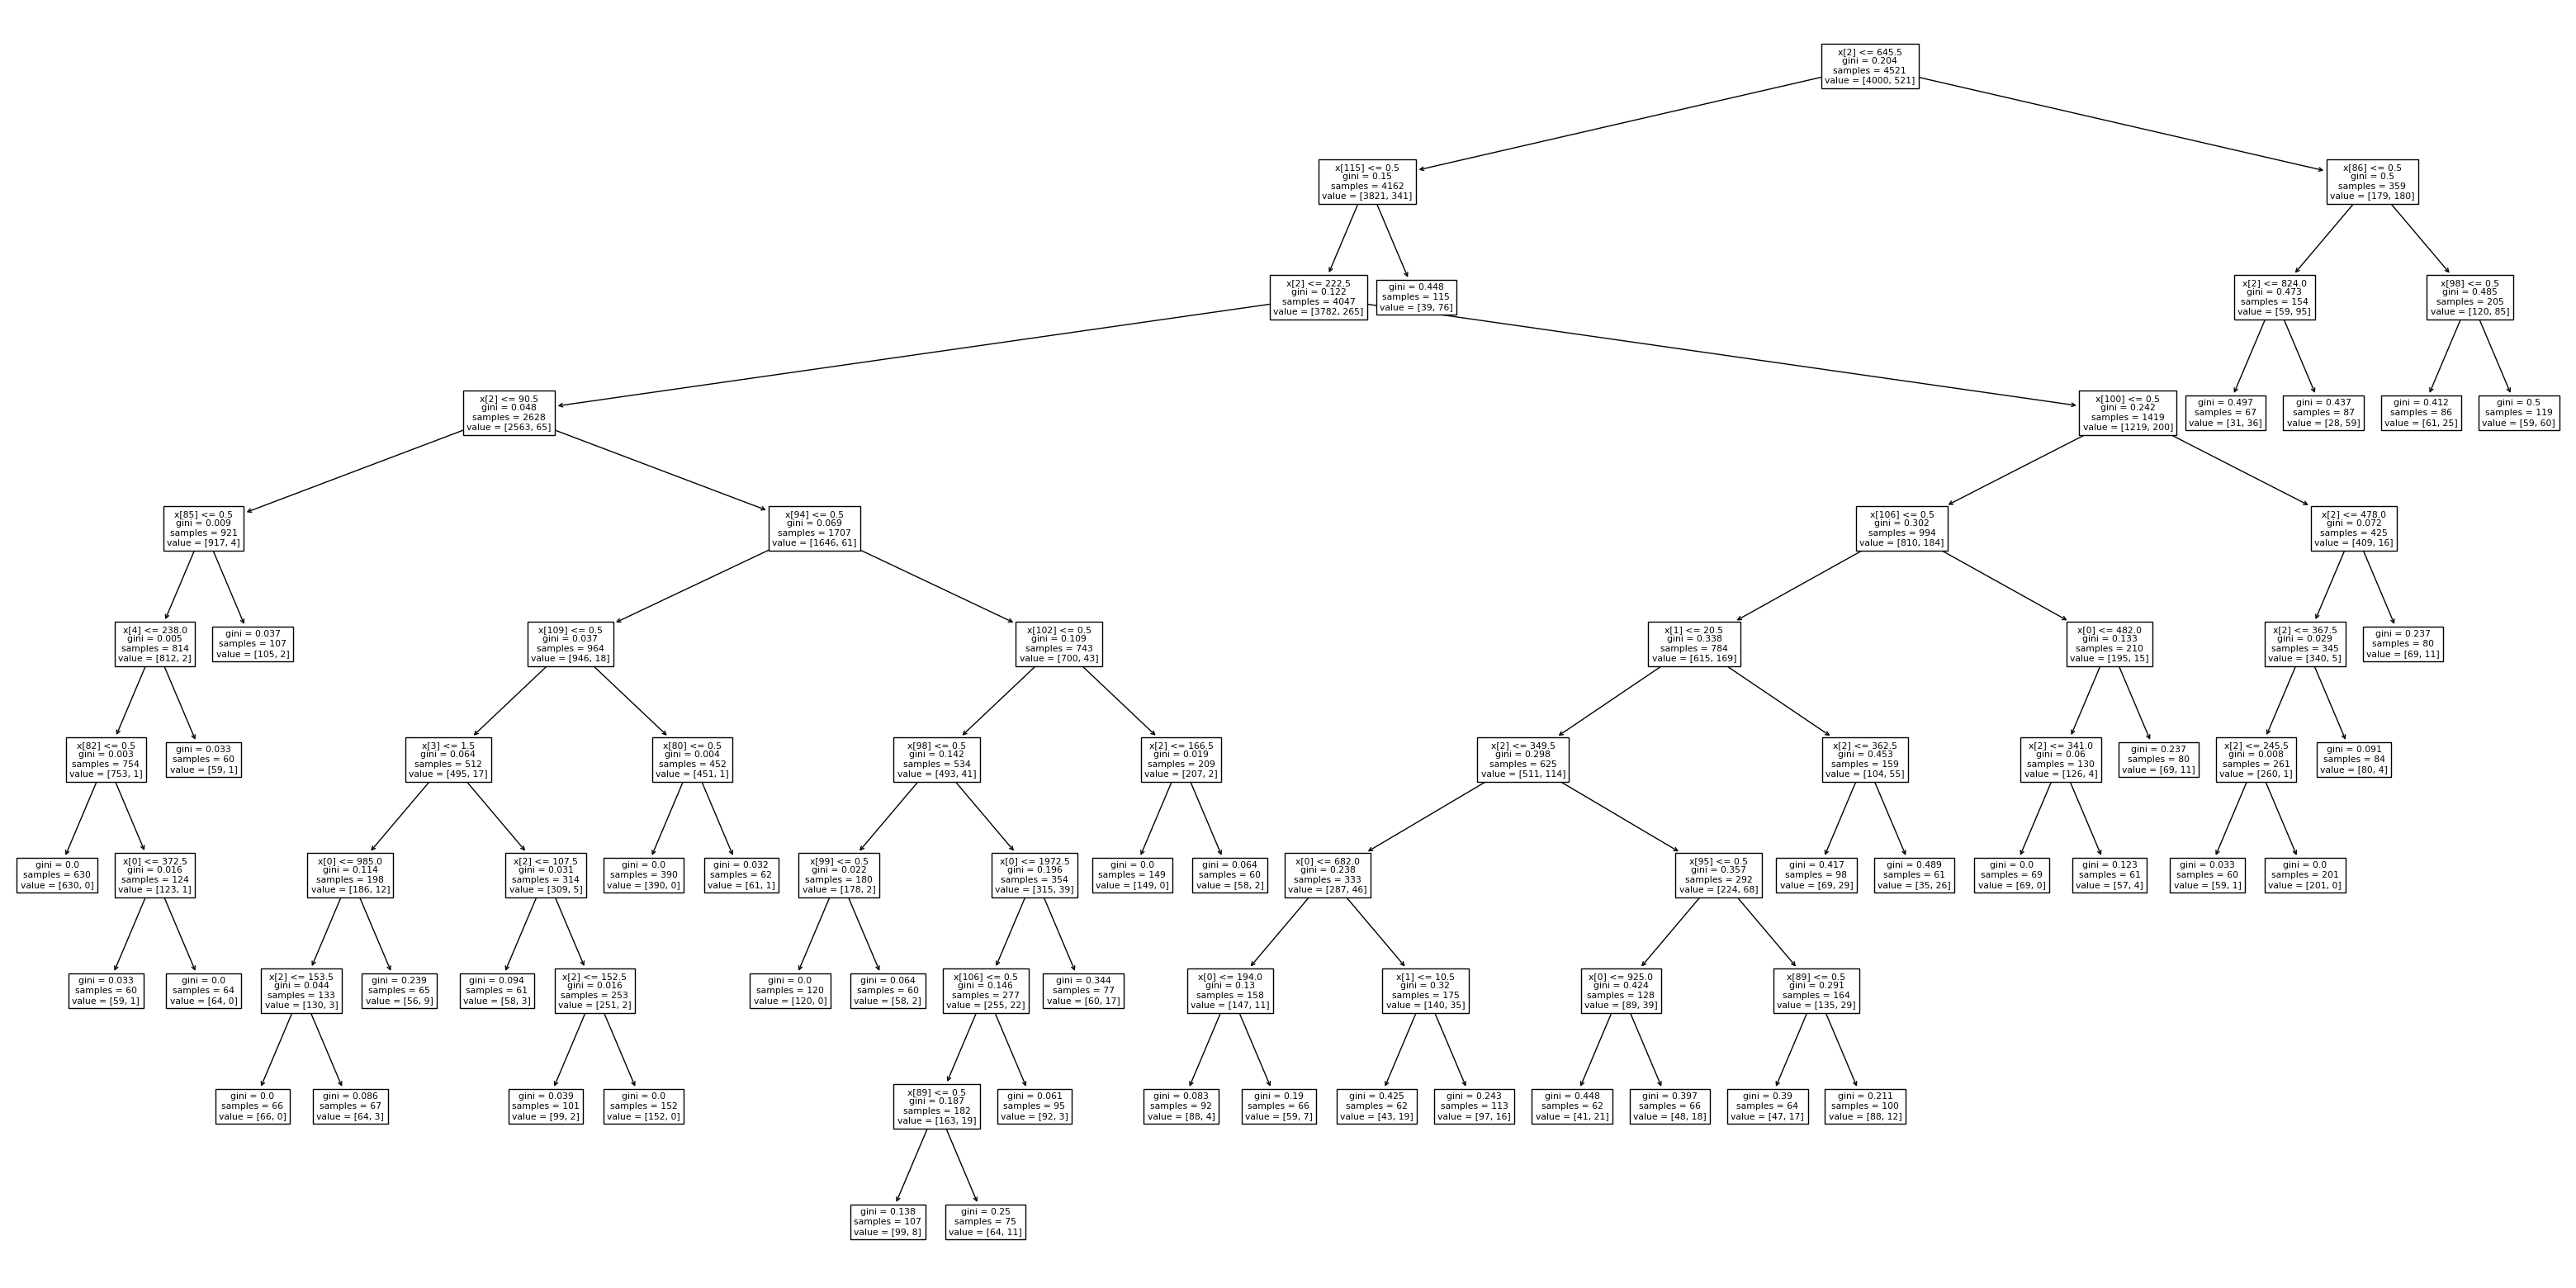

In [42]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(dtRand)

In [43]:
#Using the parameters obtained from HyperParameterTuning in the DecisionTreeClassifier 
dtRand = RandomForestClassifier(**grid_parm)
dtGrid = RandomForestClassifier(**grid_parm1)

dtRand.fit(Xtrain,Ytrain)
dtRand_predict = dtRand.predict(Xtest)
dtGrid.fit(Xtrain,Ytrain)
dtGrid_predict = dtGrid.predict(Xtest)

In [44]:
# Accuracy for Random forest using Random Search CV for Hyperparameter Tuning

print("Test Accuracy:", metrics.accuracy_score(Ytest,dtRand_predict))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,dtRand_predict))
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, dtRand_predict))
clf_cv_score = cross_val_score(dtRand, Xtrain, Ytrain, cv=5, scoring="balanced_accuracy")
print(clf_cv_score)

Test Accuracy: 0.8952909690119661
Confusion Matrix for Decision Tree:
[[39548   374]
 [ 4360   929]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          no       0.90      0.99      0.94     39922
         yes       0.71      0.18      0.28      5289

    accuracy                           0.90     45211
   macro avg       0.81      0.58      0.61     45211
weighted avg       0.88      0.90      0.87     45211

[0.55589286 0.56       0.54014423 0.56961538 0.57735577]


In [45]:
# Accuracy for Random Forest using Grid Search for Hyperparameter Tuning

print("Test Accuracy:", metrics.accuracy_score(Ytest,dtGrid_predict))
print("Confusion Matrix for Decision Tree:")
print(confusion_matrix(Ytest,dtGrid_predict))
print('Printing the precision and recall, among other metrics')
print(metrics.classification_report(Ytest, dtGrid_predict))
clf_cv_score = cross_val_score(dtGrid, Xtrain, Ytrain, cv=5, scoring="balanced_accuracy")
print(clf_cv_score)

Test Accuracy: 0.8830594324390082
Confusion Matrix for Decision Tree:
[[39922     0]
 [ 5287     2]]
Printing the precision and recall, among other metrics
              precision    recall  f1-score   support

          no       0.88      1.00      0.94     39922
         yes       1.00      0.00      0.00      5289

    accuracy                           0.88     45211
   macro avg       0.94      0.50      0.47     45211
weighted avg       0.90      0.88      0.83     45211

[0.5 0.5 0.5 0.5 0.5]
